# 1 SVM定义
支持向量机（support vector machines）= 支持向量（support vector） + 算法（machine）

用支持向量来寻找超平面，分割我们的数据。
## 1.1 Support Vector？
支持向量就是说位于最大间隔“线”上的“点”
# 2 预备知识
## 2.1 如何定义一个平面
一个平面可以由平面内的一个点P0和一个垂直于平面的向量构成。如图，我们根据w向量以及P0点确定了一个平面
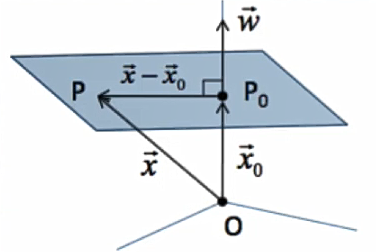
在这个平面上，由于垂直关系，有如下性质：

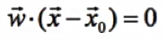
我们将w向量乘进去，把常数项定义为b，得到该平面的表达式：

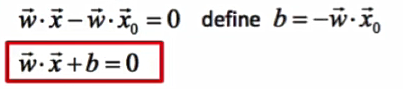
w作为法向量，x和w都是相同维度的列向量，x是平面上的点，而b代表的就是超平面到原点的距离
到这里我们只是表示了一个平面，接下来谈一谈如何求得两个平面的距离（点到平面距离的问题）
## 2.2 两个平行平面的距离
如图，两个平行平面及其向量表示如下，固定原点，可以根据w向量得到x2向量（wx2+b2=0平面）和x1向量（wx1+b1=0平面），平面距离表示为为|x2-x1|=|tw|

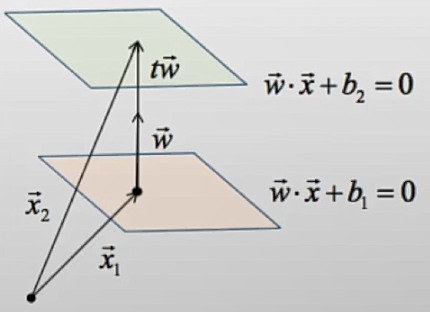

将x2用x1、tw表示，然后将表示后的x2带入该平面的式子中去，再根据x1在其平面的性质（wx1+b1=0），我们可以消去x1,x2，得到t和b，w的关系

而我们两平面的距离|tw|记为D，就可以表示为红框中的式子。
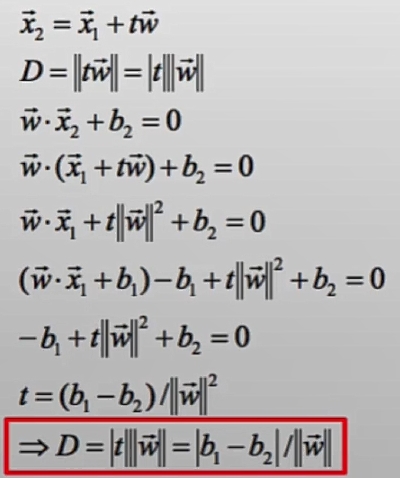

# 3 SVM线性可分数据（hard-margin linear SVM）
首先谈谈最简单的，用SVM去分类线性可分数据。

线性可分数据就是低维度的、直观的就可以看出来的数据，用一条直线就可以把数据划开。

我们将寻找+1、-1两类样本间隔最大的平面。

于是，对于+1样本的数据，有wx(+1)+b(+1)=0；对于-1样本的数据，有wx(-1)+b(-1)=0，（这里的括号是角标，表示类型）

为了分割这两个平面（或这两类数据），我们找到两个平面中间的一个平面，中间的这个平面就可以用来预测我们的新数据了。
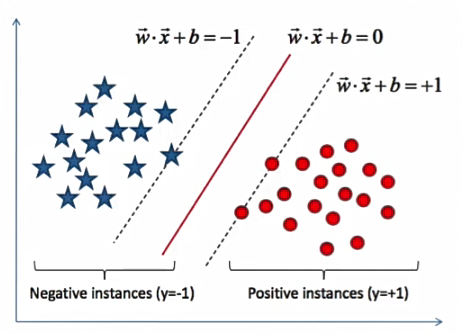

可以知道，我们的两个超平面，其实是由其各自的支持向量所确定的，是可调整的。如对于+1样本点，那些处于簇边界的点极其容易成为支持向量，我们选择那些合适的点作为支持向量，+1样本的超平面就确定出来了。所以，我们调整两个样本的支持向量，一定可以得到b(+1)-b(-1)=2，于是我们中间的超平面取b=b(+1)-b(-1)-1约等于1的样子。

注意：图中其实是将b(+1)、b(-1)都用b表示了：
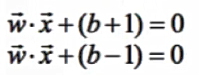

所以到此为止，我们就是根据两平面的最大间隔来找中间划分超平面，由于一定可以得到b(+1)-b(-1)=2，此时的D就可以表示为：
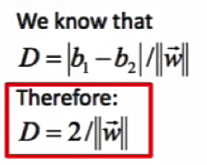

## 3.1优化目标
我们的问题就变成了寻找两超平面间的最大锤子间距，在两个样本正确区分的前提下
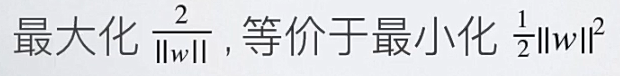

这是一个条件极值问题，专业的，我们将问题表示如下：
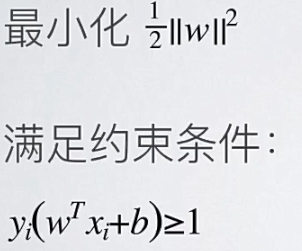

这个约束条件其实是两类样本的约束条件合在一起写的，如下：
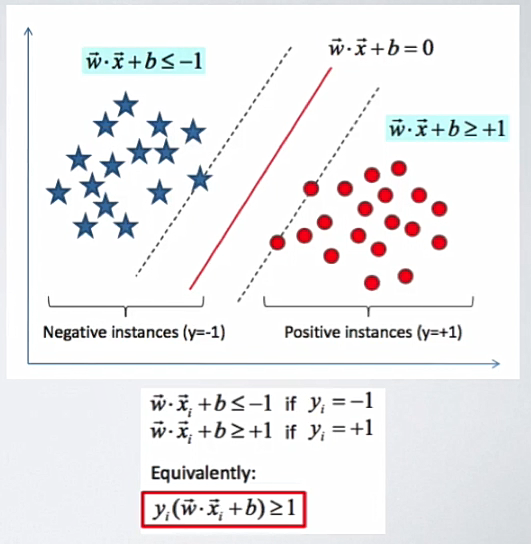

## 3.2 问题求解
首先，这个问题是一个凸函数的条件极值问题，高数课本上学过，在处理条件极值问题的时候，我们可以利用拉格朗日乘子，将约束条件放到凸函数后面，这样就把条件极值问题转化为了一般的极值问题，方便我们的计算（关于拉格朗日乘子为什么可以把条件极值问题转化为了一般的极值问题，这里可以看李航的统计或者西瓜书附录，不必深究，大概是刚好是切点还是怎么的，这里会这么化就行了）

于是我们的问题就写成了：
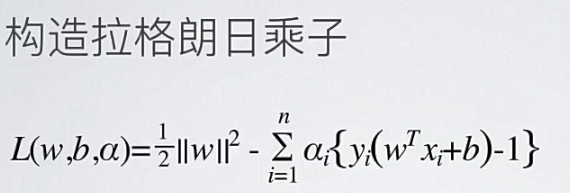
注意：这里的拉格朗日形式是有规定的条件的，写成这种规定格式的函数，要求：算子要大于0，约束条件写过去要小于0，算子和约束条件相乘为0，这三个就是后面要说的kkt条件

我们的原问题表示为：
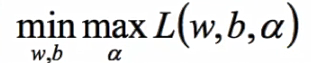
关于这个min，max的顺序，以及为什么写max，高数书上写的有

可以看到，我们要先确定拉格朗日乘子再去算关于wb的，我们如果max算子，算子那一坨求出来永远是负的，最后去min这个L，就变成了算子取正无穷，算子那一坨是负无穷，整个L就是负无穷了，这样搞毫无意义，而且求解算法复杂大也巨tm大。

于是我们采用对偶方法，即交换min和max的顺序，为什么这样做可以呢？个人觉得可以按鞍点的意思来理解，建议百度下鞍点的图，顺便贴上一条知乎大神的理解：

用拉格朗日对偶并没有改变最优解，而是改变了算法复杂度：

在原问题下，求解算法的复杂度与样本维度（等于权值w的维度）有关；

而在对偶问题下，求解算法的复杂度与样本数量（等于拉格朗日算子a的数量）有关。

于是，原问题min max，对偶问题就转换为了max min
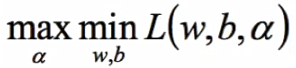

满足kkt条件下的拉格朗日式子，根据其kkt条件，我们对w、b求偏导，在极小值点有偏导为0：
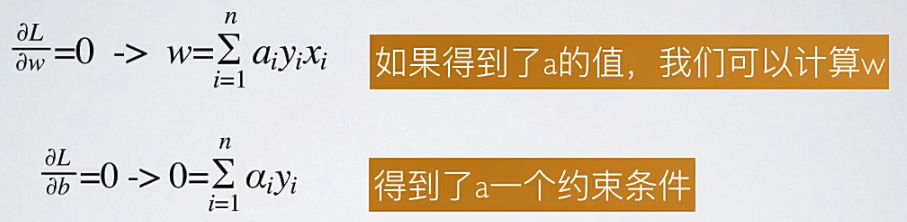
继续，我们利用kkt条件得出的偏导等式拿到原式中做替换，得到了最终的式子（即求关于alpha的max的式子，wb被消去）：

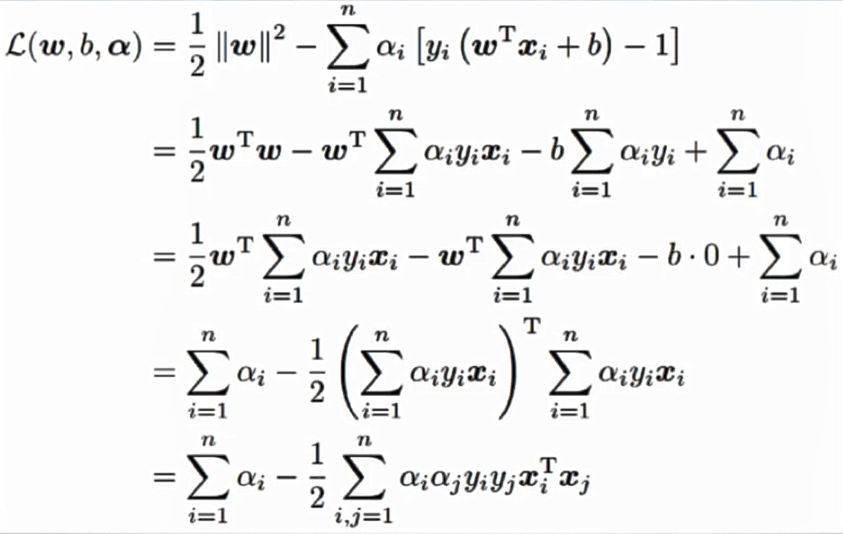

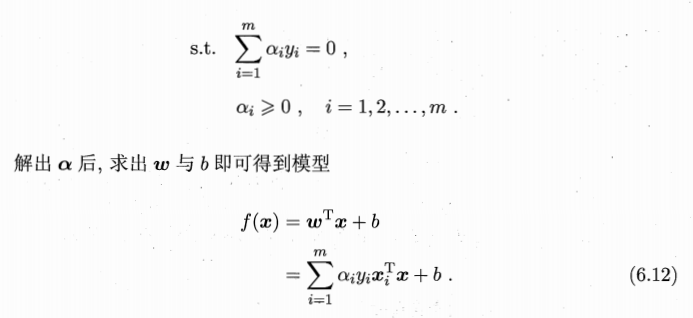
可以看到这里又“产生”了新的约束条件，其实这两个条件都是我们kkt条件里面的，我们把原来的条件极值问题写成拉格朗日形式就要满足拉格朗日算子大于0（这是第一个条件），我们后面在求偏导的时候，做替换，又需要满足第二个条件，所以最终我们得到了书上的式子。

这里我们的w和b可以这样求，分类决策函数y就可以sign函数响应为：
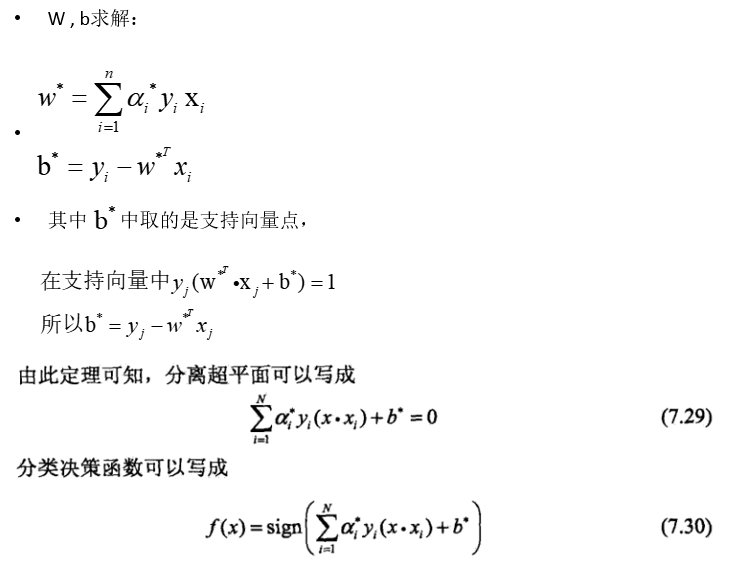
总结下：以上推导优化问题的好处在于

1、原问题是求解min wb，w的维度和x是一致的，现在改为了求解max alpha，其维度和样本数目是一致的

2、优化问题的样本计算为x的点积形式，方面引入核函数，用于高维数据分类。

# 4 SVM线性不可分数据（软间隔、松弛变量的应用）
之前的数据都是用一个超平面可以完美的将两种类别的数据分开，即切开后左黑右白，左右没有任何杂质，然而我们实际的数据往往都不是泾渭分明的，间隔中很多数据是线性不可分的，即便我们找到了这样一个超平面，也很难说这个超平面就是适用的，因为很大程度上这个超平面是过拟合的情况下得来的。

为了缓解这个问题，我们可以允许一些支持向量样本出错，使得判定更为松弛，这样的好处就在于减少了我们的过拟合的情况。

我们引入松弛间隔 ξ（越小越好）使得判定更为松弛,作为惩罚，我们引入惩罚因子C，原来的min 1/2 （w^2）后面多多了一个惩罚模块，这个模块就是用C对松弛“代价” ξ的和的惩罚。我们最终就是要使得式子最小min，并且错误分类的个数（cost&penalty）也尽量小，C自然而然就成为了协调者，也自然而然成为了我们实际问题中需要考虑、尝试的参数。
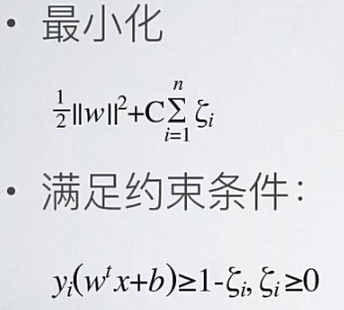

## 4.1 拉格朗日对偶问题形式
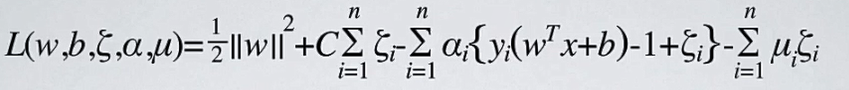
其中alpha和u都是拉格朗日算子，都需要大于等于0.。
接着我们求解对偶形式下的maxmin问题，同样的，首先求偏导wbξ，然后带入原式

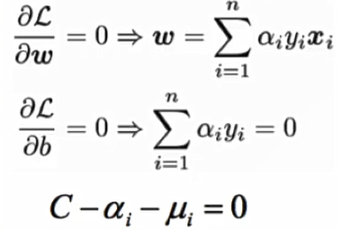

同样的，根据kkt条件，原问题最后就写为了：
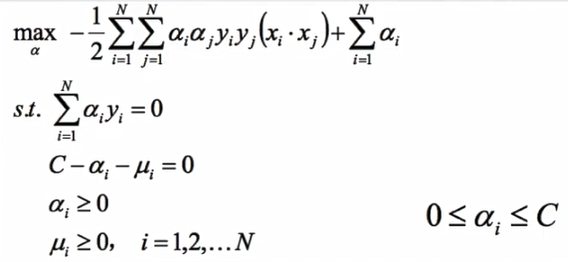
因为我们的c-alpha-u=0，alpha和u都大于0，所以这里就可以整合为0<alpha<C，这里的u可以由alpha确定，故u也用alpha代替了

同样的，我们的输出：
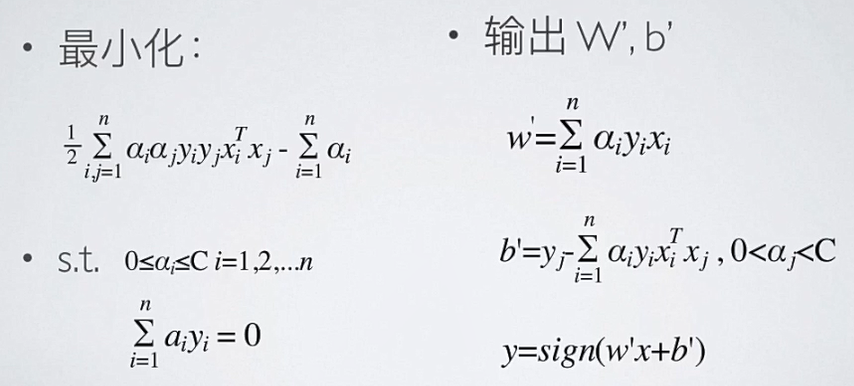

# 5 SMO优化算法在SVM中的应用（序列最小最优化算法）
smo算法就是说：如果所有的样本点都满足最优化问题的kkt条件，那么最优化问题就求解得到了。其核心是从alpha=0这种特殊情况开始，他在最初假设了所有的alpha都为0，此时的alpha是不满足最优化问题的，然后不断的调整alpha，使得alpha满足最优化问题。
## 5.1 最优化问题回顾
可以看到，当我们的alpha全为0时，我们的约束条件是满足的，但是我们的优化目标不是min。
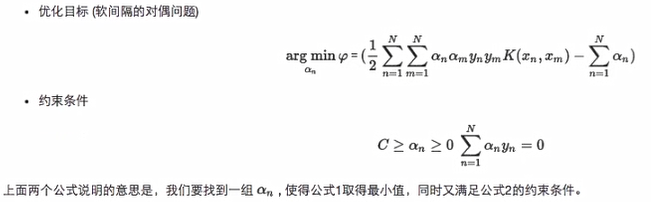

## 5.2 两个变量的二次规划求解方法
首先看看alpha和点位置的关系，根据kkt条件，可以看到alpha=0时，我们的样本“必须”被正确分类；而alpha在0和C之间时，这个点正好是支持向量；alpha为C时，我们的样本“必须”被错误分类，这里说“必须”，是说alpha所处的范围如果不满足上述样本推论，则说明这个alpha违反了我们的kkt条件
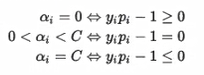
于是，我们就可以用这个来不断的调整alpha，通过计算判别错误来选择错误的alpha，另外一个alpha可以简单的随机选择（只要和第一个不同即可）。

## 5.3 alpha更新约束框
我们的两个alpha在更新时要满足约束条件来更新，以得到最优值：
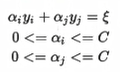
由于alpha*y=0，我们其实是把两个alpha拿出来，其他的记为一个常数，放在右边

假设我们的两个y都为+，则根据kkt，我们的两个alpha也为+，我们把ai和aj当作x和y坐标的话，可以画出约束框。

根据等式，我们可以计算出端点的值，然后这两个alpha（点x，y）就只能在这条线上滑动。

图中红圈圈出的就是y都为+的特殊情况：
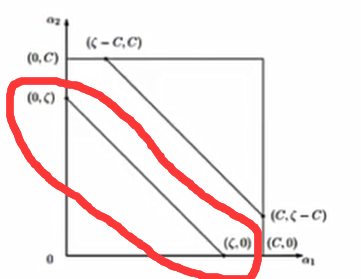

我们对两个y的4种组合（++，--，+-，-+）都画出其约束线段，就可以得到我们的约束框。

y不同时：
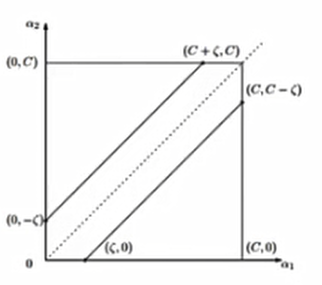
y相同时：

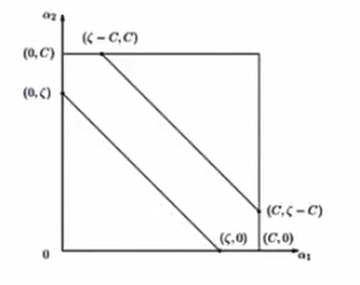
我们的最优值就有了满足条件，L<alpha2<H

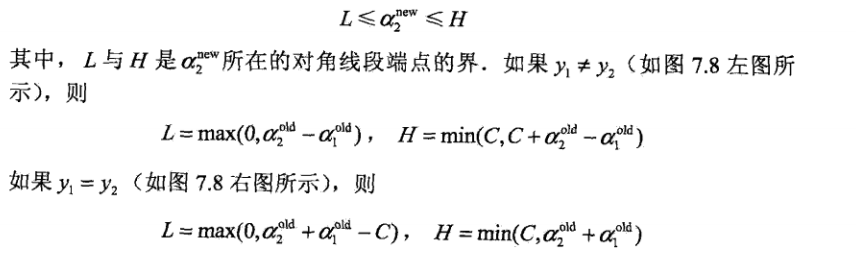

我们根据约束框进行更新：

首先计算未剪切（即alpha2不限制在0到C之间）的最优解alpha2（unc），这里需要计算两个alpha预测出来的值和真实输出的差E1和E2，以及一个η，然后我们的alpha（unc）就可以更新(具体为什么可以看李航的序列最小最优化算法部分，这里个人觉得会用就行了)
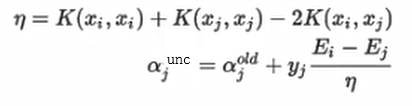

补充下Ei的计算：
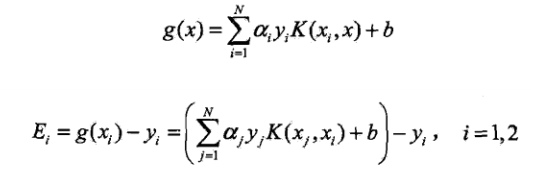
然后求剪切之后的alpha2（new），这个剪切其实很简单，如果这个点alpha（unc）在这条线上，超出了哪边的头，我们就把alpha（unc）移动到超出的头，alpha（new）就更新为这个头；如果alpha（unc）正好在我们的L和H内，我们就可以直接把alpha（unc）赋值给alpha（new）

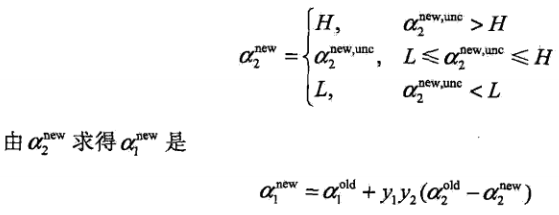
因为alpha_1_old+alpha_2_old=alpha_1_new+alpha_2_new= ξ

这样，我们就更新了两个alpha。接下来，我们就可以根据alpha来更新我们初始为0的b了：

可以确定，现在的alpha都是满足kkt条件的，即可以正确判别。

当alpha在0和C之间时，即为支持向量，由kkt条件可以知：
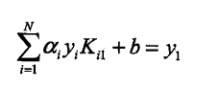

于是我们的b new 和 E new 就可以得出：
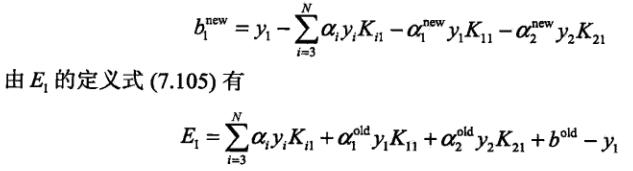

总结一下alpha i j 的更新过程
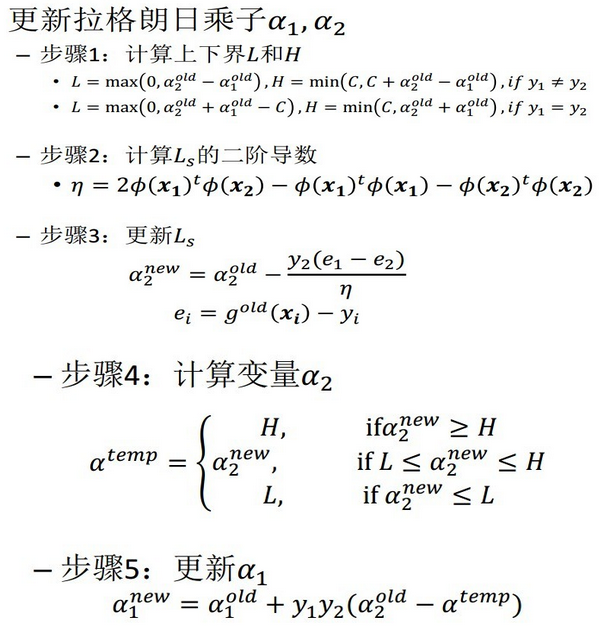

于是，根据两个alpha在其满足的不同kkt条件下的组合，我们的b这样更新：
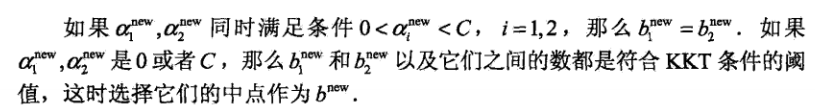
即是如果两个alpha有一个在0到C内（至少有一个为支持向量），那么b new = b_1_new or b new = b_2_new【任选一个都可以使得b在两个样本超平面之间】；如果两个alpha为0或者C，我们就取b1new和b2new的中间值（同时为0：一左一右，正好可以取中间；同时为C：也是一左一右，只是位置分错了，是对立的，也正好取中间【也在两个样本超平面之间】；如果alpha分别为0和C，说明都分到了同一边，我们也取中间值的【虽然都在同一边，但是取中间值后，b依然在两个样本超平面之间】）

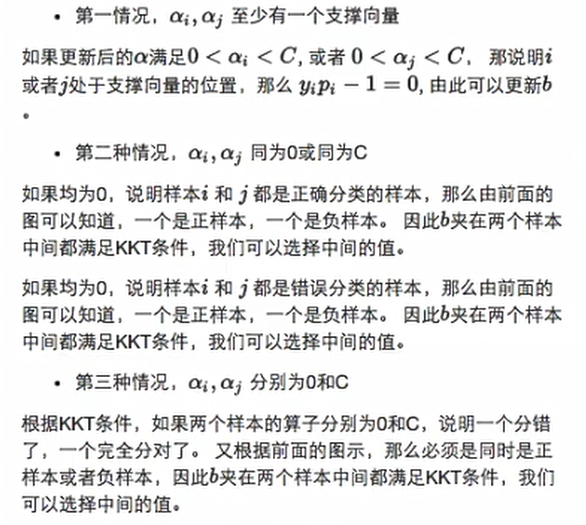

# 6 C和sigma的选择
## 6.1 核函数技巧
解决由于高维数据产生的线性不可分问题，通过核函数提升维度。

简单的说就是将我们之前的xi和xj的点积，用高斯核函数替换，这样就把数据提升到了高维。

常用的核函数如下：
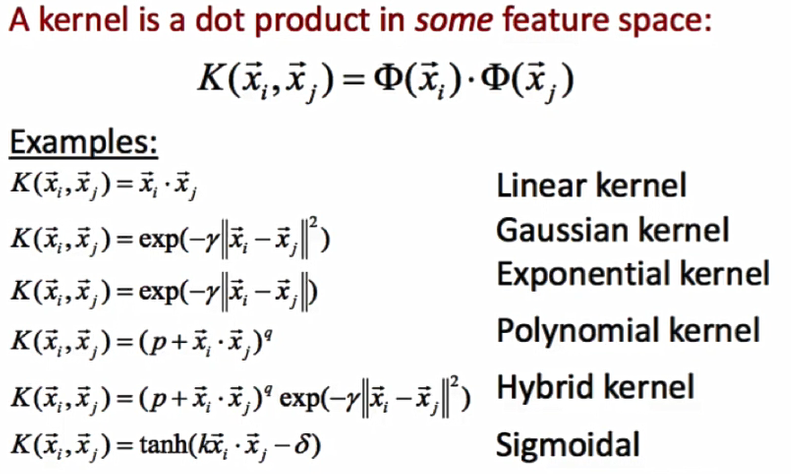
## 6.2 参数选择
C上升，则我们分类的margin就下降：我们等于0的点变多了，0到C的点变少了，但是错误的点也增多了；数据密度大，建议提高C，数据密度小，建议降低C

sigma是高斯核中的参数，sigma上升，线性度就上升（个人理解为包容性更强），sigma太低的话，就会分类的非常极端。

In [2]:
from numpy import *
import matplotlib.pyplot as plt        

In [3]:
def loadDataSet(fileName):
    '''
    Args:
        fileName 文件名
    Returns:
        dataMat  特征矩阵
        labelMat 类标签
    '''
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

In [16]:
dataArr, labelArr = loadDataSet('6.SVM/testSet.txt')
datamat = mat(dataArr)
print dataArr[:5]
print datamat[1,:]
print labelArr[:5]
# m, n = shape(dataArr)
# print n

[[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372]]
[[ 3.018896  2.556416]]
[-1.0, -1.0, 1.0, -1.0, 1.0]


In [6]:
'''
选择smo中alphai和alphaj两个参数
'''
def selectJrand(i, m):
    """
    随机选择一个整数
    Args:
        i  第一个alpha的下标
        m  所有alpha的数目
    Returns:
        j  返回一个不为i的随机数，在0~m之间的整数值
    """
    j = i
    while j == i:
# 循环出一个j not equal i
        j = int(random.uniform(0, m))
    return j

In [7]:
'''
约束框的剪切
'''
def clipAlpha(aj, H, L):
    """clipAlpha(调整aj的值，使aj处于 L<=aj<=H)
    Args:
        aj  目标值
        H   最大值
        L   最小值
    Returns:
        aj  目标值
    """
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [23]:
'''
巨大的smo算法循环来了~~~
'''
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    '''
    Args:
        dataMatIn    数据集
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率（是指在某个体系中能减小一些因素或选择对某个系统产生不稳定的概率。）
        maxIter 退出前最大的循环次数
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子    
    '''
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)#m个样本，n=2
    
    #初始化b和alpha
    b = 0
    alphas = mat(zeros((m,1)))#zeros(shape, dtype=float, order='C')
    iter = 0
    while (iter < maxIter):#外循环，迭代次数控制
        # 记录alpha是否已经进行优化，每次循环时设为0，然后再对整个集合顺序遍历
        alphaPairsChanged = 0                                                                                          
        for i in range(m):#内循环，对每个数据样本进行处理
            # print 'alphas=', alphas
            # print 'labelMat=', labelMat
            # print 'multiply(alphas, labelMat)=', multiply(alphas, labelMat)
            
            # 我们预测的类别 y = w^Tx[i]+b; 其中因为 w = Σ(1~n) a[n]*lable[n]*x[n]
            '''
            y = w^Tx+b
            而w = Σ(i=1~n)alpha[i] * y[i] * x[i]
            然后分类函数转化为：y = ｛Σ(i=1~n)alpha[i] * y[i] * x[i]｝^T x + b
                                  =  (i=1~n)alpha[i] * y[i] * <x[i],x> + b
            为什么这里和公式不太一样呢?
            关于这个的解释，july博客上说的比较清晰：
            这里的形式的有趣之处在于，对于新点 x（即dataMatrix[i, :]）的预测，只需要计算它与训练数据点的内积即可（<.>表示向量内积），
            这一点至关重要，是之后使用 Kernel 进行非线性推广的基本前提。
            '''
            fXi = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[i, :].T)) + b
            
            # 预测结果与真实结果比对，计算误差Ei
            Ei = fXi - float(labelMat[i])

            #kkt条件,我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值
            # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
            # 表示发生错误的概率：labelMat[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
            '''
            # 首先检验训练样本(xi, yi)是否满足KKT条件
            yi*f(i) >= 1 and alpha = 0 (outside the boundary) 违背情况为：yi*f(i) >= 1 but alpha > 0
            yi*f(i) == 1 and 0<alpha< C (on the boundary) 违背情况为：yi*f(i) == 1 but （alpha = 0 or alpha = C ）
            yi*f(i) <= 1 and alpha = C (between the boundary) 违背情况为：yi*f(i) <= 1 but alpha < C 

            这里的toler设置为1就和上面一样了，我们优化处于违背kkt的点
            '''
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
            #如果样本满足优化条件，我们使用下面的算法——SMO的核心，来学习两个新的alpha
                j = selectJrand(i, m)# 如果满足优化的条件，我们就随机选取非i的一个点，进行优化比较
                # 预测j的结果
                fXj = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()
                '''
                1.计算上下界L和H
                2.计算二阶导eta
                3.更新
                '''
                # L和H的计算，分两种情况yi和yj相同和不同时
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                
                #L和H如果相同，就不优化了（不然还想怎么优化？？？）
                if L == H:
                    print("L==H")
                    continue
                
                #按着公式写eta
                eta = 2.0 * dataMatrix[i, :]*dataMatrix[j, :].T - dataMatrix[i, :]*dataMatrix[i, :].T - dataMatrix[j, :]*dataMatrix[j, :].T
                #如果eta==0，需要退出for循环的当前迭代过程
                if eta >= 0:
                    print("eta>=0")
                    continue

                # 计算出一个新的alphas[j]值
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                
                # 使用约束框的裁剪函数进行裁剪
                alphas[j] = clipAlpha(alphas[j], H, L)
                
                # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    print("j not moving enough")
                    continue
                    
                # 然后alphas[i]根据公式进行更新
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                
                # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
                # w= Σ[1~n] ai*yi*xi => b = yj- Σ[1~n] ai*yi(xi*xj)
                # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
                # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[i, :].T\
                - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i, :]*dataMatrix[j, :].T
                
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[j, :].T\
                - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j, :]*dataMatrix[j, :].T
                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
        # 在for循环外，检查alpha值是否做了更新，如果在更新则将iter设为0后继续运行程序
        # 知道更新完毕后，iter次循环无变化，才推出循环。
        if (alphaPairsChanged == 0):#表示无需再进行更新了
            iter += 1
        else:
            iter = 0
        print("iteration number: %d" % iter)  
    return b, alphas

In [24]:
def calcWs(alphas, dataArr, classLabels):
    """
    基于alpha计算w值
    Args:
        alphas        拉格朗日乘子
        dataArr       feature数据集
        classLabels   目标变量数据集

    Returns:
        wc  回归系数
    """
    X = mat(dataArr)
    labelMat = mat(classLabels).transpose()
    m, n = shape(X)
    w = zeros((n, 1))
    for i in range(m):
        w += multiply(alphas[i] * labelMat[i], X[i, :].T)
    return w

In [25]:
def plotfig_SVM(xMat, yMat, ws, b, alphas):
    """
    参考地址：
       http://blog.csdn.net/maoersong/article/details/24315633
       http://www.cnblogs.com/JustForCS/p/5283489.html
       http://blog.csdn.net/kkxgx/article/details/6951959
    """

    xMat = mat(xMat)
    yMat = mat(yMat)

    # b原来是矩阵，先转为数组类型后其数组大小为（1,1），所以后面加[0]，变为(1,)
    b = array(b)[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 注意flatten的用法
    ax.scatter(xMat[:, 0].flatten().A[0], xMat[:, 1].flatten().A[0])

    # x最大值，最小值根据原数据集dataArr[:, 0]的大小而定
    x = arange(-1.0, 10.0, 0.1)

    # 根据x.w + b = 0 得到，其式子展开为w0.x1 + w1.x2 + b = 0, x2就是y值
    y = (-b-ws[0, 0]*x)/ws[1, 0]
    ax.plot(x, y)

    for i in range(shape(yMat[0, :])[1]):
        if yMat[0, i] > 0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'cx')
        else:
            ax.plot(xMat[i, 0], xMat[i, 1], 'kp')

    # 找到支持向量，并在图中标红
    for i in range(100):
        if alphas[i] > 0.0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'ro')
    plt.show()

iter: 0 i:0, pairs changed 1
iter: 0 i:2, pairs changed 2
iter: 0 i:4, pairs changed 3
iter: 0 i:5, pairs changed 4
j not moving enough
L==H
iter: 0 i:10, pairs changed 5
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
iter: 0 i:29, pairs changed 6
j not moving enough
j not moving enough
j not moving enough
L==H
iter: 0 i:54, pairs changed 7
iter: 0 i:55, pairs changed 8
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
L==H
iter: 0 i:81, pairs changed 9
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
iteration number: 0
iter: 0 i:0, pairs changed 1
j not moving enough
iter: 0 i:4, pairs changed 2
j not moving enough
j not moving enough
L==H
iter: 0 i:12, pairs changed 3
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:30, pairs changed 4
j not moving enough
iter: 

j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:52, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
iter: 0 i:10, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:69, pairs changed 2
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:55, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving en

iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
iter: 10 i:8, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough

iteration number: 8
j not moving enough
j not moving enough
iter: 8 i:52, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iter: 3 i:55, pairs changed 1
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
L==H
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving en

j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
iter: 7 i:54, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not movi

iteration number: 16
j not moving enough
iteration number: 17
j not moving enough
iteration number: 18
j not moving enough
iteration number: 19
j not moving enough
iteration number: 20
j not moving enough
iteration number: 21
j not moving enough
iteration number: 22
j not moving enough
iteration number: 23
j not moving enough
iteration number: 24
iter: 24 i:17, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
iteration number: 1
j not moving enough
iteration number: 2
j not moving enough
iteration number: 3
j not moving enough
iteration number: 4
j not moving enough
iteration number: 5
j not moving enough
iteration number: 6
j not moving enough
iteration number: 7
j not moving enough
iteration number: 8
j not moving enough
iteration number: 9
j not moving enough
iteration number: 10
j not moving enough
iteration number: 11
j not moving enough
iteration number: 12
j not moving enough
iteration number: 13
j not moving enough
iteration number: 14
j not moving en

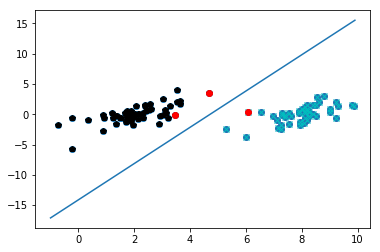

In [26]:
# 获取特征和目标变量
dataArr, labelArr = loadDataSet('6.SVM/testSet.txt')
# print labelArr

# b是常量值， alphas是拉格朗日乘子
b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)
print '/n/n/n'
print 'b=', b
print 'alphas[alphas>0]=', alphas[alphas > 0]
print 'shape(alphas[alphas > 0])=', shape(alphas[alphas > 0])
for i in range(100):
    if alphas[i] > 0:
        print dataArr[i], labelArr[i]
# 画图
ws = calcWs(alphas, dataArr, labelArr)
plotfig_SVM(dataArr, labelArr, ws, b, alphas)